<a href="https://colab.research.google.com/github/JQuinteroC/Investigacion_Operaciones-20203/blob/master/M%C3%A9todo_grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Método gráfico

'''
Jose Luis Quintero Cañizalez - 20181020061
David Armando Rodríguez Varón - 20181020041
Juan Sebastián Sánchez Tabares - 20181020008
'''

#Imports
import numpy as np
import matplotlib.pyplot as plt
import sympy as sim

In [2]:
#Plotting region
def plot_func(func, start, stop, x, y):
  '''
  Grafica la región dada las condiciones

  Args:
  func -- función a graficar
  start -- número que contiene el inicio del area a graficar
  stop -- número que contiene el fin del area a graficar
  x -- variable x
  y -- variable y
  '''

  plt.imshow((func).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Blues", alpha = 0.3)

  x = np.linspace(start, stop, 2000)  

  plt.xlim(start, stop)
  plt.ylim(start, stop)
  plt.xlabel(r'$x$')
  plt.ylabel(r'$y$')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

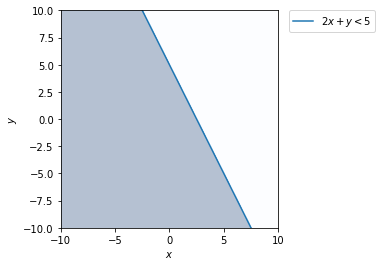

In [ ]:
#Resolver 2x+y < 5

d = np.linspace(-15, 15, 300)
x, y = np.meshgrid(d, d)


f = 2 * x + y < 5

s = np.linspace(-15, 15, 2000)
y2 = 5 - 2 * s
plt.plot(s, y2, label=r'$2x+y<5$')

plot_func(f, -10, 10, x, y)

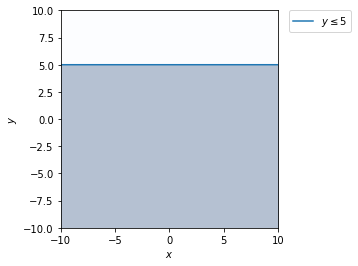

In [ ]:
#Resolver y <= 5

d = np.linspace(-15, 15, 300)
x, y = np.meshgrid(d, d)

f = y <= 5

s = np.linspace(-15, 15, 2000)
y2 = 5 + s * 0
plt.plot(s, y2, label=r'$y\leq5$')

plot_func(f, -10, 10, x, y)

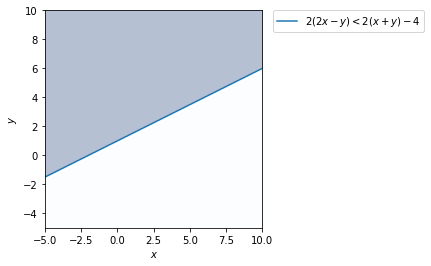

In [ ]:
#Resolver 2 (2x - y) < 2 (x + y) - 4 

d = np.linspace(-15, 15, 300)
x, y = np.meshgrid(d, d)

f = 2 * (2 * x - y) < 2 * (x + y) - 4

s = np.linspace(-15, 15, 2000)
y2 = s / 2 + 1
plt.plot(s, y2, label=r'$2 (2x - y) < 2 (x + y) - 4$')

plot_func(f, -5, 10, x, y)

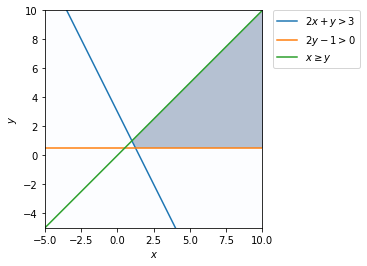

In [ ]:
'''Resolver
      2x+y>3
      2y-1>0
      x >= y
'''

d = np.linspace(-15, 15, 300)
x, y = np.meshgrid(d, d)

f = (2 * x + y > 3) & (2 * y - 1 > 0) & (x >= y)

s = np.linspace(-15, 15, 2000)
y2 = 3 - 2 * s
plt.plot(s, y2, label=r'$2x+y>3$')
y3 = 1 / 2 + s * 0
plt.plot(s, y3, label=r'$2y-1>0$')
y4 = s
plt.plot(s, y4, label=r'$x\geq y$')

plot_func(f, -5, 10, x, y)

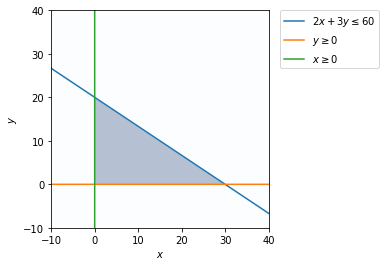

In [ ]:
'''Resolver
      2x+3y <= 60 
      x >= 0
      y >= 0
'''

d = np.linspace(-15, 45, 600)
x, y = np.meshgrid(d, d)

f = (2 * x + 3 * y <= 60) & (x >= 0) & (y >= 0)

s = np.linspace(-15, 45, 2000)
y2 = (60 - 2 * s) / 3
plt.plot(s, y2, label=r'$2x+3y\leq 60$')
y3 = s * 0
plt.plot(s, y3, label=r'$y \geq 0$')
plt.plot(np.zeros_like(s), s, label=r'$x\geq 0$')

plot_func(f, -10, 40, x, y)

El valor maximizado es: 520, en las coordenadas: (40, 60)


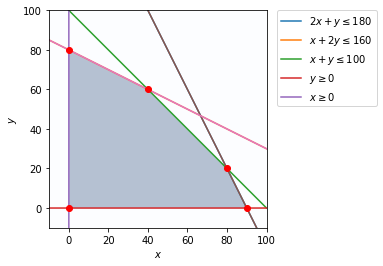

In [ ]:
'''Resolver
      p = 4x+6y
    sujeto a:
      2x+y<=180
      x+2y<=160
      x >= 0
      x+y<= 100
      y >=0
'''

d = np.linspace(-15, 105, 600)
x, y = np.meshgrid(d, d)

f = (2 * x + y <= 180) & (x + 2 * y <= 160) & (x >= 0) & (x + y <= 100) & (y >= 0)

s = np.linspace(-10, 100, 2000)
y2 = 180 - 2 * s
plt.plot(s, y2, label=r'$2x+y\leq 180$')
y3 = (160 - s) / 2
plt.plot(s, y3, label=r'$x+2y\leq 160$')
y5 = 100 - s
plt.plot(s, y5, label=r'$x+y\leq 100$')
y4 = s * 0
plt.plot(s, y4, label=r'$y \geq 0$')
plt.plot(np.zeros_like(s), s, label=r'$x\geq 0$')
plt.plot(s, y2, s, y3)

xi, yi = sim.symbols('xi, yi')

points = [(0, 0), (0, 80)]
px, px = [], []
cons = [180 - 2 * xi, (160 - xi) / 2, 100 - xi, xi * 0]

for i in range(len(cons) - 1):
  for k in range(i + 1, len(cons)):
    eq = sim.Eq(cons[i], cons[k])
    sol = sim.solve([eq], (xi, yi))
    #print(cons[i])
    #print(cons[i+1])
    #print(sol)
    eqst = str(cons[i])
    sol2 = eval(eqst, {'xi': sol[xi]})
    #print(sol2, sol[xi])
    points.append((sol[xi], sol2))

points.remove((100, 0))
points.remove((200/3, 140/3))
points.remove((160, 0))

p = set(points)

for pair in p:
  xt, yt = pair
  plt.plot(xt, yt, 'ro')

plot_func(f, -10, 100, x, y)

max = '4 * x+6 * y'

value = -100000
xm, ym = 0, 0

for pair in p:
  xt, yt = pair
  new_value = eval(max, {'x': xt, 'y': yt})
  if new_value >= value:
    value = new_value
    xm = xt
    ym = yt

print('El valor maximizado es: {}, en las coordenadas: ({}, {})'.format(value, xm, ym))

El valor maximizado es: 4200, en las coordenadas: (21, 0)


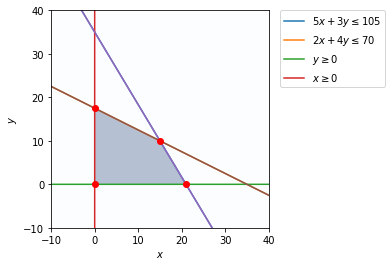

In [10]:
'''Resolver
      p = 200x+100y
      sugeto a:
      5x+3y<=105
      2x+4y<=70
      x >= 0
      y >=0
'''

d = np.linspace(-15, 105, 600)
x, y = np.meshgrid(d, d)

f = (5 * x + 3 * y <= 105) & (2 * x + 4 * y <= 70) & (x >= 0) & (y >= 0)

s = np.linspace(-10, 40, 2000)
y2 = (105 - 5 * s) / 3
plt.plot(s, y2, label=r'$5x+3y\leq 105$')
y3 = (70 - 2 * s) / 4
plt.plot(s, y3, label=r'$2x+4y\leq 70$')
y4 = s * 0
plt.plot(s, y4, label=r'$y \geq 0$')
plt.plot(np.zeros_like(s), s, label=r'$x\geq 0$')
plt.plot(s, y2, s, y3)

xi, yi = sim.symbols('xi, yi')

points = [(0, 0), (0, 35/2)]
px, px = [], []
cons = [(105 - 5 * xi) / 3, (70 - 2 * xi) / 4, xi * 0]

for i in range(len(cons) - 1):
  for k in range(i + 1, len(cons)):
    eq = sim.Eq(cons[i], cons[k])
    sol = sim.solve([eq], (xi, yi))
    eqst = str(cons[i])
    sol2 = eval(eqst, {'xi': sol[xi]})
    points.append((sol[xi], sol2))

points.remove((35, 0))
#points.remove((200/3, 140/3))
#points.remove((160, 0))

p = set(points)

for pair in p:
  xt, yt = pair
  plt.plot(xt, yt, 'ro')

plot_func(f, -10, 40, x, y)

max = '200 * x+6 * y'

value = -100000
xm, ym = 0, 0

for pair in p:
  xt, yt = pair
  new_value = eval(max, {'x': xt, 'y': yt})
  if new_value >= value:
    value = new_value
    xm = xt
    ym = yt

print('El valor maximizado es: {}, en las coordenadas: ({}, {})'.format(value, xm, ym))